# 「世界で最も丸い湖」を探す 🌏


[Natural Earth » 1:10m Physical Vectors - Free vector and raster map data at 1:10m, 1:50m, and 1:110m scales](https://www.naturalearthdata.com/downloads/10m-physical-vectors/)


In [2]:
import math

import pandas as pd
import geopandas as gpd
import altair as alt

## 湖沼


In [5]:
gdf = gpd.read_file("./data/Natural Earth/ne_10m_lakes/ne_10m_lakes.shp")
gdf

featurecla  scalerank                   name            name_abb  \
0          Lake          9                Eğirdir             Egridir   
1          Lake          7               Beyşehir            Beysehir   
2          Lake          5               Engozero            Engozero   
3          Lake          4               Pääjärvi            Paajarvi   
4          Lake          9  Ozero Pitlyarskiy Sor  O. Pitlyarskiy Sor   
...         ...        ...                    ...                 ...   
1350  Reservoir          8            Lake Pedder           L. Pedder   
1351  Reservoir          8            Lake Gordon           L. Gordon   
1352  Reservoir          4    Smallwood Reservoir      Smallwood Res.   
1353  Reservoir          7    Presa Miguel Alemán  Psa. Miguel Aleman   
1354  Reservoir          5             Lago Gatun            L. Gatun   

                      name_alt  note                           delta  \
0                         None  None  New or modified in version 1.2   
1                         None  None  New or modified in version 1.2   
2                         None  None  New or modified in version 1.2   
3     Lake Pya, Ozero Pjaozero  None  New or modified in version 1.2   
4         Lake Pitlyarskiy Sor  None  New or modified in version 1.2   
...                        ...   ...                             ...   
1350                      None  None                            None   
1351                      None  None                            None   
1352                      None  None                            None   
1353                      None  None                            None   
1354                Gatun lake  None                            None   

             dam_name  year admin  ...                name_tr  \
0                None   -99  None  ...                Eğirdir   
1                None   -99  None  ...               Beyşehir   
2                None   -99  None  ...               Engozero   
3                None   -99  None  ...               Pääjärvi   
4                None   -99  None  ...  Ozero Pitlyarskiy Sor   
...               ...   ...   ...  ...                    ...   
1350             None  1972  None  ...            Pedder Gölü   
1351       Gordon Dam  1974  None  ...            Gordon Gölü   
1352  Churchill Falls  1971  None  ...   Smallwood Rezervuarı   
1353             None   -99  None  ...    Presa Miguel Alemán   
1354        Gatun Dam  1913  None  ...                  Gatun   

                 name_vi   name_zh       ne_id               name_fa  \
0                Eğirdir    埃伊尔迪尔湖  1159106675               اگیردیر   
1               Beyşehir    貝伊謝希爾湖  1159106685                بیسهیر   
2            Hồ Engozero     恩戈澤羅湖  1159106693               انگوزرو   
3            Hồ Pääjärvi    皮亚奥泽罗湖  1159106703               پاجاروی   
4     Hồ Pitlyarskiy Sor  皮特亚斯科索尔湖  1159106711  اوزرو پیتلیارسکی سور   
...                  ...       ...         ...                   ...   
1350           Hồ Pedder       佩德湖  1159122955          دریاچه پِدِر   
1351           Hồ Gordon       戈登湖  1159122971         دریاچه گوردون   
1352        Hồ Smallwood   斯莫尔伍德水库  1159123999      مخزن سد اسمالوود   
1353    Hồ Miguel Alemán  米格尔阿莱曼水库  1159123597     پرسا میگوئل المان   
1354               Gatun       加通湖  1159123579            لاگو گاتون   

                 name_he                name_uk                 name_ur  \
0            אגם אאירדיר                Егридир                  ایگردر   
1            אגם ביישהיר               Бейшехір                   بےسحر   
2                אנגוזרו               Енгозеро               اینگوزیرو   
3          אגם פאאיארווי                Пяозеро                 پاجاروی   
4     אגם פיטליארסקי סור  озеро Питлярський Сор  اوزیرو پٹلیارسکائی سار   
...                  ...                    ...                     ...   
1350             אגם פדר                 Педдер               جھیل پیڈر   
1351          אגם

In [6]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Measures


In [8]:
# from geographic CRS to projected CRS
# Equal-area projection (WGS 84 / NSIDC EASE-Grid 2.0 Global)
# cf. https://epsg.io/6933
gdf = gdf.to_crs(6933)

In [9]:
gdf["perimeter"] = gdf.geometry.length
gdf["area"] = gdf.area

### マルチポリゴン


In [10]:
# check type of geometry
gdf.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [11]:
gdf[gdf.geom_type == "MultiPolygon"]

featurecla  scalerank           name       name_abb       name_alt  \
14             Lake          4           None           None           None   
216            Lake          7           None           None           None   
257            Lake          7           None           None           None   
468            Lake          3  Whitefish Bay  Whitefish Bay    Great Lakes   
472            Lake          0    Lake Ladoga      L. Ladoga           None   
544            Lake          5     Lake Rukwa       L. Rukwa           None   
1054      Reservoir          6   Lake Imandra     L. Imandra           None   
1306  Alkaline Lake          5    Lake Hammar      L. Hammar           None   
1307  Alkaline Lake          5  Khyargas Nuur  Khyargas Nuur  Khyargas Lake   

                        note delta  dam_name  year    admin  ...  name_zh  \
14                      None  None      None   -99     None  ...     None   
216             _untitled_62  None      None   -99     None  ...     None   
257             _untitled_24  None      None   -99     None  ...     None   
468                     None  None      None   -99  admin-0  ...      白魚灣   
472   Largest lake in Europe  None      None   -99     None  ...     拉多加湖   
544                     None  None      None   -99     None  ...      鲁夸湖   
1054                    None  None  Kumskaya  1963     None  ...    伊曼德拉湖   
1306                    None  None      None   -99     None  ...     哈马尔湖   
1307                    None  None      None   -99     None  ...    吉爾吉斯湖   

           ne_id          name_fa           name_he         name_uk  \
14    1159106799             None              None            None   
216   1159109347             None              None            None   
257   1159109885             None              None            None   
468   1159113039    خلیج وایت فیش  אגם ווייטפיש ביי     Вайтфіш-Бей   
472   1159113095    دریاچه لادوگا         ימת לדוגה  Ладозьке озеро   
544   1159114299     دریاچه روکوا         אגם רוקאה           Руква   
1054  1159123217  دریاچه ایماندرا       אגם אימנדרה         Імандра   
1306  1159126873         هور حمار          אגם האמר    озеро Гаммар   
1307  1159126887      خیارگاس نور       אגם חיארגאס      Хярґас-Нур   

            name_ur name_zht  \
14             None     None   
216            None     None   
257            None     None   
468     وہائٹ فش بے      白魚灣   
472     جھیل لاڈوگا     拉多加湖   
544       جھیل رکوا      魯誇湖   
1054   جھیل اماندرا    伊曼德拉湖   
1306      جھیل حمار     哈马尔湖   
1307  کھائراگاس نور    吉爾吉斯湖   

                                               geometry     perimeter  \
14    MULTIPOLYGON (((-9674552.858 5902344.940, -967...  4.984234e+05   
216   MULTIPOLYGON (((-11679383.228 6386671.996, -11...  2.401502e+02   
257   MULTIPOLYGON (((-6593001.170 5908184.668, -659...  5.076824e+05   
468   MULTIPOLYGON (((-8178923.852 5360222.617, -818...  2.862277e+05   
472   MULTIPOLYGON (((2902112.730 6429999.468, 29031...  1.235612e+06   
544   MULTIPOLYGON (((3079995.080 -962630.981, 30795...  2.291902e+05   
1054  MULTIPOLYGON (((3089765.402 6778313.776, 30791...  9.990926e+05   
1306  MULTIPOLYGON (((4506433.732 3741680.931, 45089...  3.639926e+05   
1307  MULTIPOLYGON (((8965170.119 5558213.725, 89650...  2.354883e+05   

              area  
14    1.562260e+09  
216   2.648593e+02  
257   5.030885e+08  
468   1.945497e+09  
472   1.766574e+10  
544   1.937516e+09  
1054  9.988378e+08  
1306  9.283653e+08  
1307  1.354304e+09  

[9 rows x 44 columns]

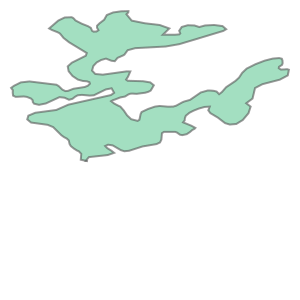

In [16]:
gdf.iloc[14].geometry

### 面積


In [18]:
gdf.sort_values("area", ascending=False).head()

featurecla  scalerank             name       name_abb     name_alt  note  \
465       Lake          0    Lake Superior    L. Superior  Great Lakes  None   
478       Lake          0    Lake Victoria    L. Victoria         None  None   
467       Lake          0       Lake Huron       L. Huron  Great Lakes  None   
466       Lake          0    Lake Michigan    L. Michigan  Great Lakes  None   
477       Lake          0  Lake Tanganyika  L. Tanganyika         None  None   

    delta dam_name  year    admin  ...  name_zh       ne_id           name_fa  \
465  None     None   -99  admin-0  ...    苏必利尔湖  1159112991    دریاچه سوپریور   
478  None     None   -99  admin-0  ...    維多利亞湖  1159113191   دریاچه ویکتوریا   
467  None     None   -99  admin-0  ...      休伦湖  1159113021     دریاچه هیوران   
466  None     None   -99  admin-0  ...     密歇根湖  1159113005    دریاچه میشیگان   
477  None     None   -99  admin-0  ...    坦干依喀湖  1159113185  دریاچه تانگانیکا   

          name_he       name_uk         name_ur name_zht  \
465  ימת סופיריור  Озеро Верхнє    جھیل سپیریئر    苏必利尔湖   
478  אגם ויקטוריה      Вікторія    جھیل وکٹوریہ    維多利亞湖   
467     ימת יורון         Гурон     جھیل ہیورون      休伦湖   
466    ימת מישיגן       Мічиган     جھیل مشی گن     密歇根湖   
477   אגם טנגניקה    Танганьїка  جھیل ٹانگانیکا    坦干依喀湖   

                                              geometry     perimeter  \
465  POLYGON ((-8152413.611 5312206.759, -8152167.9...  3.341472e+06   
478  POLYGON ((3272192.089 -195426.182, 3271340.026...  4.081594e+06   
467  POLYGON ((-7687198.300 5158981.529, -7686346.2...  3.436109e+06   
466  POLYGON ((-8179577.100 5252245.501, -8180627.9...  2.056335e+06   
477  POLYGON ((2972720.350 -1091196.566, 2972038.69...  1.809552e+06   

             area  
465  8.230985e+10  
478  6.703171e+10  
467  5.993697e+10  
466  5.754025e+10  
477  3.275500e+10  

[5 rows x 44 columns]

In [19]:
gdf.sort_values("area", ascending=True).head()

featurecla  scalerank  name name_abb name_alt           note delta  \
216       Lake          7  None     None     None   _untitled_62  None   
749       Lake          9  None     None     None  _untitled_326  None   
53        Lake          4  None     None     None    _untitled_0  None   
841       Lake          9  None     None     None  _untitled_267  None   
750       Lake          9  None     None     None  _untitled_324  None   

    dam_name  year         admin  ...  name_zh       ne_id name_fa name_he  \
216     None   -99          None  ...     None  1159109347    None    None   
749     None   -99  admin-0 more  ...     None  1159118129    None    None   
53      None   -99          None  ...     None  1159107185    None    None   
841     None   -99          None  ...     None  1159119741    None    None   
750     None   -99  admin-0 more  ...     None  1159118147    None    None   

    name_uk name_ur name_zht  \
216    None    None     None   
749    None    None     None   
53     None    None     None   
841    None    None     None   
750    None    None     None   

                                              geometry   perimeter  \
216  MULTIPOLYGON (((-11679383.228 6386671.996, -11...  240.150152   
749  POLYGON ((2029117.392 4789346.687, 2029145.795...  574.416151   
53   POLYGON ((-9841170.936 6151053.996, -9841156.7...  330.601593   
841  POLYGON ((9564648.868 6993833.718, 9564592.063...  313.675765   
750  POLYGON ((2029145.795 4789146.675, 2029202.599...  212.852567   

            area  
216   264.859346  
749   405.763379  
53    586.078238  
841  1063.684440  
750  1217.332722  

[5 rows x 44 columns]

### 丸さ


In [20]:
gdf["roundness"] = 4 * math.pi * gdf["area"] / (gdf["perimeter"] ** 2)

In [22]:
gdf.sort_values("roundness", ascending=False)

featurecla  scalerank                        name  \
1315  Alkaline Lake          7                   Lake Abbe   
748            Lake          9           Lago di Bracciano   
1018           Lake          9                        None   
898            Lake          9           Ozero Kuchukskoye   
897            Lake          9  Ozero Bol'shoye Topol'noye   
...             ...        ...                         ...   
1352      Reservoir          4         Smallwood Reservoir   
1191      Reservoir          6            Vilyuy Reservoir   
50             Lake          4                        None   
490            Lake          3                    Päijänne   
484            Lake          2                 Lake Saimaa   

                     name_abb                       name_alt           note  \
1315                  L. Abbe                           None           None   
748           L. di Bracciano                           None           None   
1018                     None                           None  _untitled_158   
898            O. Kuchukskoye               Lake Kuchukskoye           None   
897   O. Bol'shoye Topol'noye      Lake Bol'shoye Topol'noye           None   
...                       ...                            ...            ...   
1352           Smallwood Res.                           None           None   
1191              Vilyuy Res.  Vilyuyskoye Vodokhranilishche           None   
50                       None                           None    _untitled_9   
490                    Pijnne                           None           None   
484                 L. Saimaa                           None           None   

     delta         dam_name  year         admin  ...       ne_id  \
1315  None             None   -99  admin-0 more  ...  1159126991   
748   None             None   -99          None  ...  1159118119   
1018  None             None   -99          None  ...  1159122605   
898   None             None   -99          None  ...  1159120771   
897   None             None   -99          None  ...  1159120753   
...    ...              ...   ...           ...  ...         ...   
1352  None  Churchill Falls  1971          None  ...  1159123999   
1191  None             None   -99          None  ...  1159125251   
50    None             None   -99          None  ...  1159107149   
490   None             None   -99          None  ...  1159113395   
484   None             None   -99          None  ...  1159113295   

                      name_fa                name_he                name_uk  \
1315               دریاچه ابه                אגם אבה             озеро Аббе   
748          لاگو دی براسیانو            אגם ברקיאנו               Браччано   
1018                     None                   None                   None   
898          اوزرو کوچوکسکویه        אגם קוצ'וקסקויה        озеро Кучукське   
897   اوزرو بولشویه توپولنویه  אגם בולשויה טופולנויה  озеро Велике Топольне   
...                       ...                    ...                    ...   
1352         مخزن سد اسمالوود           מאגר סמולווד                Смолвуд   
1191           مخزن سد ویلیوی          מאגר וילְיוּי  Вілюйське водосховище   
50                       None                   None                   None   
490            دریاچه پایجانی            אגם פאאיאנה                Пяйянне   
484              دریاچه سایما                  סאימה                 Саїмаа   

                         name_ur name_zht  \
1315                    جھیل ابے      阿貝湖   
748             لاگو ڈی براکیانو    布拉恰诺湖   
1018                        None     None   
898             اوزیرو کوچوکسوئے     庫丘克湖   
897   اوزیرو بول شوئے ٹوپول نوئے  大托波利諾耶湖   
...                          ...      ...   
1352           سمال ووڈ ریزروائر  斯莫爾伍德水庫   
1191             ولیوئے ریزروائر    維留伊水庫   
50                          None     None   
490                     پائیجانے     派延奈湖   
484                      سائی ما      塞馬湖   

        

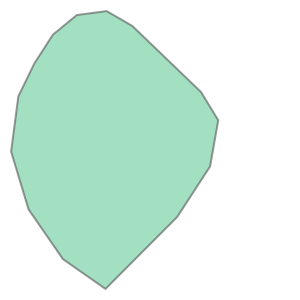

In [23]:
# Alkaline Lake
gdf.iloc[1315].geometry

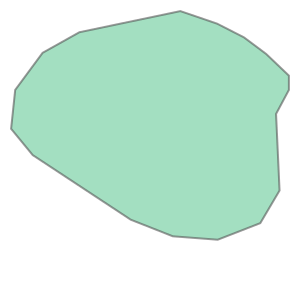

In [24]:
# Lago di Bracciano
gdf.iloc[748].geometry

In [26]:
gdf.sort_values("roundness", ascending=True)

featurecla  scalerank                        name  \
484            Lake          2                 Lake Saimaa   
490            Lake          3                    Päijänne   
50             Lake          4                        None   
1191      Reservoir          6            Vilyuy Reservoir   
1352      Reservoir          4         Smallwood Reservoir   
...             ...        ...                         ...   
897            Lake          9  Ozero Bol'shoye Topol'noye   
898            Lake          9           Ozero Kuchukskoye   
1018           Lake          9                        None   
748            Lake          9           Lago di Bracciano   
1315  Alkaline Lake          7                   Lake Abbe   

                     name_abb                       name_alt           note  \
484                 L. Saimaa                           None           None   
490                    Pijnne                           None           None   
50                       None                           None    _untitled_9   
1191              Vilyuy Res.  Vilyuyskoye Vodokhranilishche           None   
1352           Smallwood Res.                           None           None   
...                       ...                            ...            ...   
897   O. Bol'shoye Topol'noye      Lake Bol'shoye Topol'noye           None   
898            O. Kuchukskoye               Lake Kuchukskoye           None   
1018                     None                           None  _untitled_158   
748           L. di Bracciano                           None           None   
1315                  L. Abbe                           None           None   

     delta         dam_name  year         admin  ...       ne_id  \
484   None             None   -99          None  ...  1159113295   
490   None             None   -99          None  ...  1159113395   
50    None             None   -99          None  ...  1159107149   
1191  None             None   -99          None  ...  1159125251   
1352  None  Churchill Falls  1971          None  ...  1159123999   
...    ...              ...   ...           ...  ...         ...   
897   None             None   -99          None  ...  1159120753   
898   None             None   -99          None  ...  1159120771   
1018  None             None   -99          None  ...  1159122605   
748   None             None   -99          None  ...  1159118119   
1315  None             None   -99  admin-0 more  ...  1159126991   

                      name_fa                name_he                name_uk  \
484              دریاچه سایما                  סאימה                 Саїмаа   
490            دریاچه پایجانی            אגם פאאיאנה                Пяйянне   
50                       None                   None                   None   
1191           مخزن سد ویلیوی          מאגר וילְיוּי  Вілюйське водосховище   
1352         مخزن سد اسمالوود           מאגר סמולווד                Смолвуд   
...                       ...                    ...                    ...   
897   اوزرو بولشویه توپولنویه  אגם בולשויה טופולנויה  озеро Велике Топольне   
898          اوزرو کوچوکسکویه        אגם קוצ'וקסקויה        озеро Кучукське   
1018                     None                   None                   None   
748          لاگو دی براسیانو            אגם ברקיאנו               Браччано   
1315               دریاچه ابه                אגם אבה             озеро Аббе   

                         name_ur name_zht  \
484                      سائی ما      塞馬湖   
490                     پائیجانے     派延奈湖   
50                          None     None   
1191             ولیوئے ریزروائر    維留伊水庫   
1352           سمال ووڈ ریزروائر  斯莫爾伍德水庫   
...                          ...      ...   
897   اوزیرو بول شوئے ٹوپول نوئے  大托波利諾耶湖   
898             اوزیرو کوچوکسوئے     庫丘克湖   
1018                        None     None   
748             لاگو ڈی براکیانو    布拉恰诺湖   
1315                    جھیل ابے      阿貝湖   

        

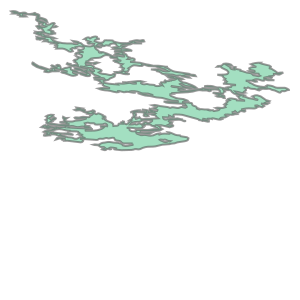

In [27]:
# Lake Saimaa
gdf.iloc[484].geometry

In [28]:
alt.Chart(gdf).mark_circle().encode(
    x="area",
    #     x=alt.X("面積").scale(type="log"),
    y="roundness",
    tooltip=["name", "area", "roundness"],
).interactive()

alt.Chart(...)